In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values

In [ ]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [ ]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [ ]:
#Using a linear kernel 
from sklearn import svm
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []

#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

print()

#test
print("Test Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)
    yhat_svc_linear_test = svc_linear.predict(x_test)
    acc_test_linear = np.mean(yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test_linear)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_linear)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_linear_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
    #print('Test Accuracy = {0:f}'.format(acc_test_linear))
    



Train Accuracy using a Linear kernel
Train Accuracy(c=0.0001): 0.8406773138349047
Train Accuracy(c=0.001): 0.98037329228401
Train Accuracy(c=0.01): 0.9830671541273812
Train Accuracy(c=0.1): 0.9832595728304792
Train Accuracy(c=1): 0.983644410236675
Train Accuracy(c=10): 0.983644410236675
Train Accuracy(c=100): 0.983644410236675

Test Accuracy using a Linear kernel
Test Accuracy(c=0.0001): 0.84
Precision: 0.827930174563591 
Recall: 0.9989969909729187 
Fscore: 0.9054545454545454
Test Accuracy(c=0.001): 0.9776923076923076
Precision: 0.9801587301587301 
Recall: 0.9909729187562688 
Fscore: 0.9855361596009976
Test Accuracy(c=0.01): 0.9807692307692307
Precision: 0.9869739478957916 
Recall: 0.9879638916750251 
Fscore: 0.987468671679198
Test Accuracy(c=0.1): 0.9830769230769231
Precision: 0.9899497487437185 
Recall: 0.9879638916750251 
Fscore: 0.9889558232931727
Test Accuracy(c=1): 0.9838461538461538
Precision: 0.9899598393574297 
Recall: 0.9889669007021064 
Fscore: 0.9894631209232313
Test Accura

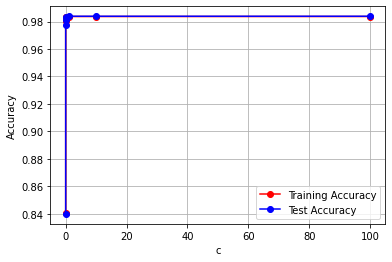

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_linear, 'ro-')
plt.plot(cVals, acc_test_svm_linear, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
#Using a rbf kernel 
acc_train_svm_rbf = []
acc_test_svm_rbf = []

#train
print("Train Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)

    yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train_rbf = np.mean(yhat_svc_rbf_train == y_train)
    acc_train_svm_rbf.append(acc_train_rbf)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_rbf)

print()

#test
print("Test Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)
    yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test_rbf = np.mean(yhat_svc_rbf_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test_rbf)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_rbf)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_rbf_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)

Train Accuracy using a RBF kernel
Train Accuracy(c=0.0001): 0.7506253607850684
Train Accuracy(c=0.001): 0.7506253607850684
Train Accuracy(c=0.01): 0.9786415239561286
Train Accuracy(c=0.1): 0.990186646142005
Train Accuracy(c=1): 0.9946122763132577
Train Accuracy(c=10): 0.996921300750433
Train Accuracy(c=100): 0.9990379064845103

Test Accuracy using a RBF kernel
Test Accuracy(c=0.0001): 0.7669230769230769
Precision: 0.7669230769230769 
Recall: 1.0 
Fscore: 0.868088811493252
Test Accuracy(c=0.001): 0.7669230769230769
Precision: 0.7669230769230769 
Recall: 1.0 
Fscore: 0.868088811493252
Test Accuracy(c=0.01): 0.9753846153846154
Precision: 0.9753694581280788 
Recall: 0.9929789368104313 
Fscore: 0.9840954274353876
Test Accuracy(c=0.1): 0.9853846153846154
Precision: 0.9880239520958084 
Recall: 0.9929789368104313 
Fscore: 0.9904952476238118
Test Accuracy(c=1): 0.9876923076923076
Precision: 0.990990990990991 
Recall: 0.9929789368104313 
Fscore: 0.9919839679358717
Test Accuracy(c=10): 0.99
Preci

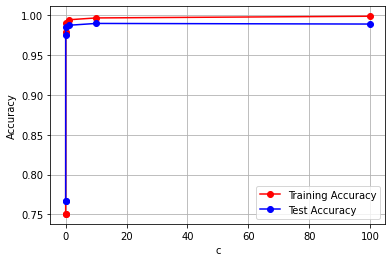

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_rbf, 'ro-')
plt.plot(cVals, acc_test_svm_rbf, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
#Using a Polynomial kernel 
acc_train_svm_poly = []
acc_test_svm_poly = []

#train
print("Train Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)

    yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train_poly = np.mean(yhat_svc_poly_train == y_train)
    acc_train_svm_poly.append(acc_train_poly)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_poly)

print()

#test
print("Test Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)
    yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test_poly = np.mean(yhat_svc_poly_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test_poly)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_poly)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_poly_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)

Train Accuracy using a poly kernel
Train Accuracy(c=0.0001): 0.7577448527996922
Train Accuracy(c=0.001): 0.8516451799114874
Train Accuracy(c=0.01): 0.9391956898210506
Train Accuracy(c=0.1): 0.9717144506446026
Train Accuracy(c=1): 0.9884548778141236
Train Accuracy(c=10): 0.9926880892822783
Train Accuracy(c=100): 0.9953819511256494

Test Accuracy using a poly kernel
Test Accuracy(c=0.0001): 0.7723076923076924
Precision: 0.7710750193348801 
Recall: 1.0 
Fscore: 0.8707423580786026
Test Accuracy(c=0.001): 0.8523076923076923
Precision: 0.8385197645079899 
Recall: 1.0 
Fscore: 0.9121683440073193
Test Accuracy(c=0.01): 0.936923076923077
Precision: 0.924791086350975 
Recall: 0.9989969909729187 
Fscore: 0.9604628736740599
Test Accuracy(c=0.1): 0.9661538461538461
Precision: 0.9603864734299516 
Recall: 0.9969909729187563 
Fscore: 0.9783464566929134
Test Accuracy(c=1): 0.9846153846153847
Precision: 0.9851042701092354 
Recall: 0.9949849548645938 
Fscore: 0.9900199600798404
Test Accuracy(c=10): 0.984

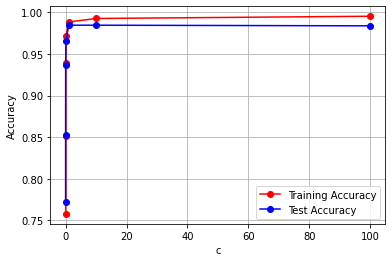

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_poly, 'ro-')
plt.plot(cVals, acc_test_svm_poly, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')